Accuracy: 0.9677, Precision: 0.9833, Recall: 0.9833, F1 Score: 0.9833


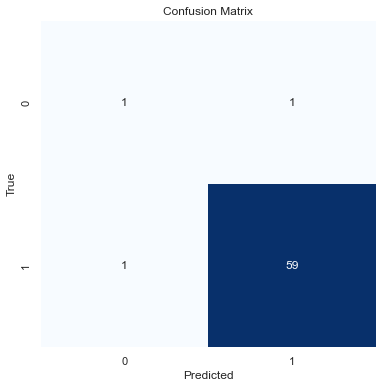

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load dataset (assuming you have a CSV file)
data = pd.read_csv('survey lung cancer.csv')

# Assuming the target column is 'LUNG_CANCER'
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']

# Identify categorical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'O']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model with the preprocessor
logistic_regression = LogisticRegression(max_iter=1000)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', logistic_regression)])

# Train the model
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'lung_cancer_model.sav')

# Load the model during prediction
loaded_model = joblib.load('lung_cancer_model.sav')

# Make predictions using the loaded model
y_pred = loaded_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='YES')
recall = recall_score(y_test, y_pred, pos_label='YES')
f1 = f1_score(y_test, y_pred, pos_label='YES')

print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

# Plot confusion matrix using Seaborn
plt.figure(figsize=(6, 6))
sns.set(style='whitegrid')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()